# Visualização de Dados
### Titanic

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('CSVs/titanic/train.csv')

In [2]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
df.columns = ['IdPassageiro', 'Sobreviveu', 'Classe',
              'Nome', 'Sexo', 'Idade', 'IrmaosConjuge', 'PaisFIlhos',
              'Bilhete', 'Tarifa', 'Cabine', 'Embarque']

In [4]:
df['Sexo'].replace({'male':'homem', 'female':'mulher'}, inplace=True)
df.head()

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaosConjuge,PaisFIlhos,Bilhete,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",homem,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df['Cabine'] = df['Cabine']\
.apply(lambda x: x[0] if pd.notna(x) else np.nan)

df['Cabine']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabine, Length: 891, dtype: object

### Matplotlib

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

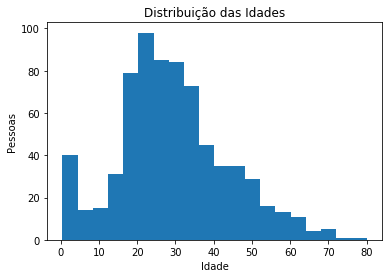

In [7]:
plt.hist(df['Idade'].dropna(), bins=20)
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Pessoas')
plt.show()

In [8]:
df['Classe'].unique()

array([3, 1, 2], dtype=int64)

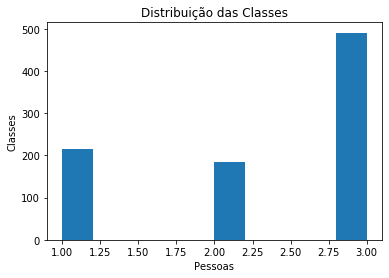

In [9]:
plt.hist(df['Classe'])
plt.title('Distribuição das Classes')
plt.xlabel('Pessoas')
plt.ylabel('Classes')
plt.show()

### Subplots - 1ª forma

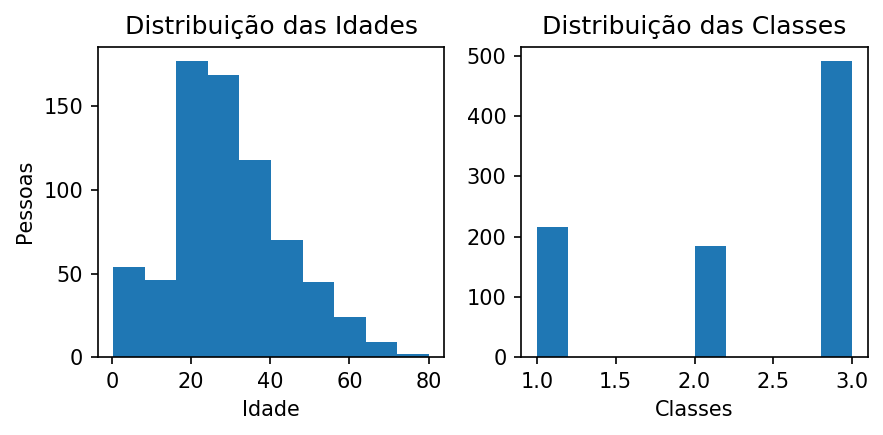

In [10]:
plt.figure(figsize=(6,3), dpi=150)
plt.subplot(1,2,1)
plt.hist(df['Idade'].dropna())
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Pessoas')

plt.subplot(1,2,2)
plt.hist(df['Classe'].dropna())
plt.title('Distribuição das Classes')
plt.xlabel('Classes')

plt.tight_layout()
plt.show()

### Subplots - 2ª forma

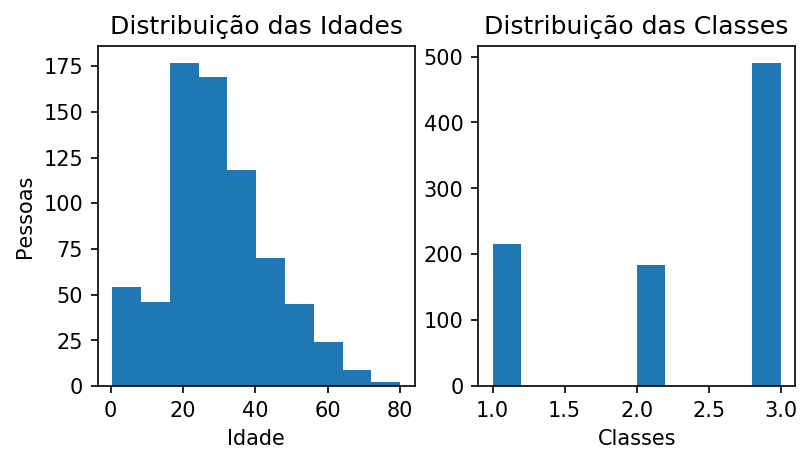

In [11]:
f, ax = plt.subplots(1,2, figsize=(6,3), dpi=150)
ax[0].hist(df['Idade'].dropna())
ax[0].set_title('Distribuição das Idades')
ax[0].set_xlabel('Idade')
ax[0].set_ylabel('Pessoas')

ax[1].hist(df['Classe'])
ax[1].set_title('Distribuição das Classes')
ax[1].set_xlabel('Classes')

plt.show()

### Seaborn

In [12]:
import seaborn as sns

In [13]:
df['Sobreviveu'].value_counts()

0    549
1    342
Name: Sobreviveu, dtype: int64

In [14]:
df['Classe'].value_counts()

3    491
1    216
2    184
Name: Classe, dtype: int64

In [15]:
df['Sexo'].value_counts()

homem     577
mulher    314
Name: Sexo, dtype: int64

### Pie e Countplot

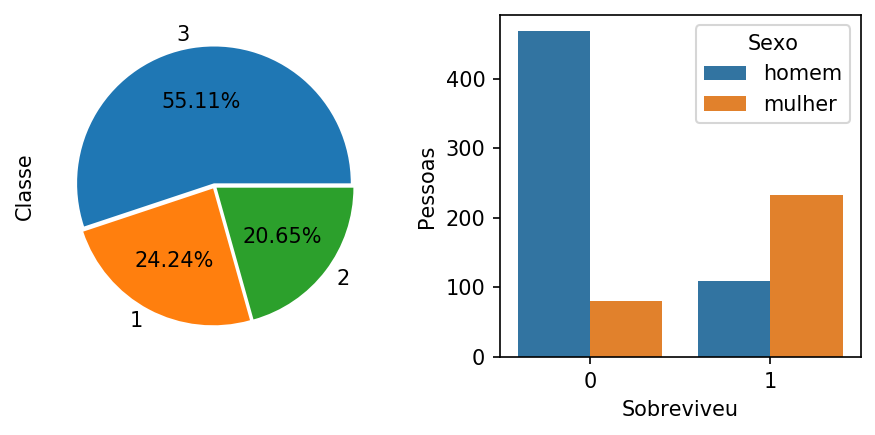

In [16]:
f, ax = plt.subplots(1,2, figsize=(6,3), dpi=150)

df['Classe'].value_counts()\
.plot.pie(ax=ax[0], explode=[0.02,0.02,0.02], autopct='%0.2f%%')

sns.countplot('Sobreviveu', data=df, ax=ax[1], hue='Sexo')
ax[1].set_ylabel('Pessoas')

plt.tight_layout()
plt.show()

### Boxplot

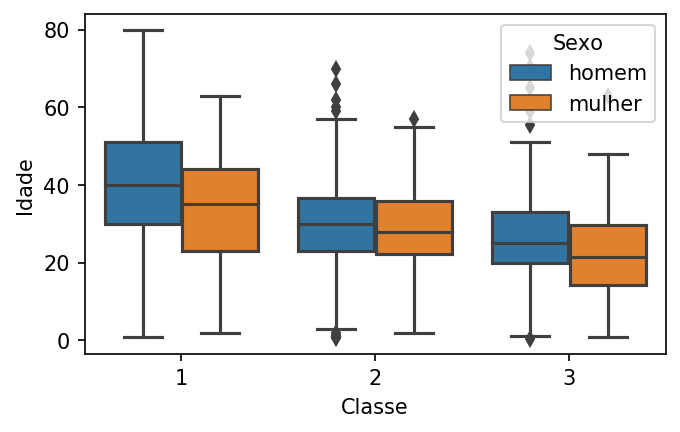

In [17]:
plt.figure(figsize=(5,3), dpi=150)
sns.boxplot(x='Classe', y='Idade', hue='Sexo', data=df)
plt.show()

### Violinplot

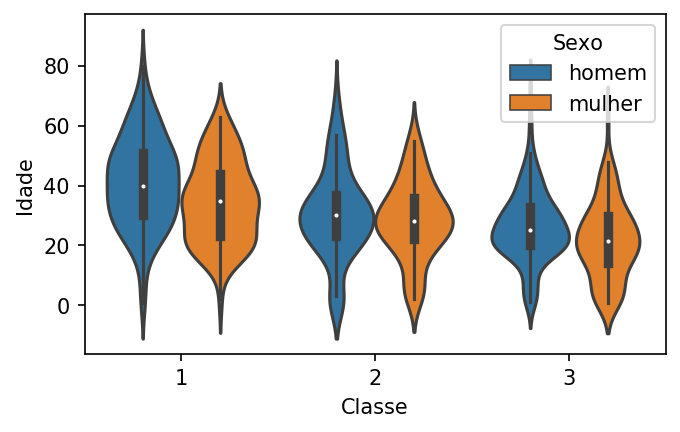

In [18]:
plt.figure(figsize=(5,3), dpi=150)
sns.violinplot(x='Classe', y='Idade', hue='Sexo', data=df)
plt.show()

### FacetGrid com hist

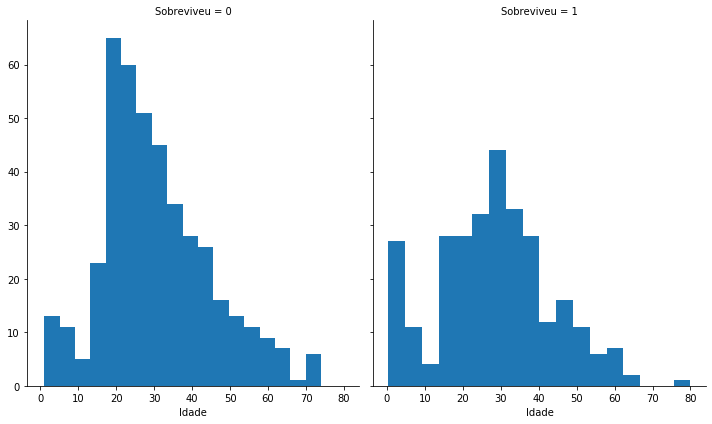

In [19]:
g = sns.FacetGrid(df, col='Sobreviveu')
g.map(plt.hist, 'Idade', bins=18)

fig = plt.gcf()
fig.set_size_inches(10,6)

plt.tight_layout()
plt.show()

### FacetGrid com barplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


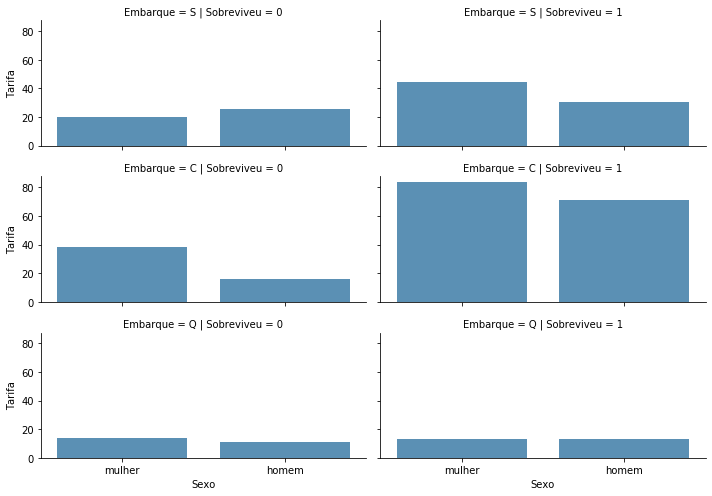

In [20]:
g = sns.FacetGrid(df, row='Embarque', col='Sobreviveu')
g.map(sns.barplot, 'Sexo', 'Tarifa', alpha=0.8, ci=None)

fig = plt.gcf()
fig.set_size_inches(10,7)

plt.tight_layout()
plt.show()

### FacetGrid com Distplot

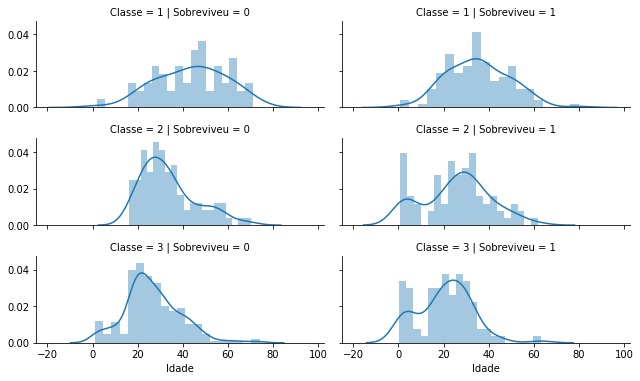

In [21]:
g = sns.FacetGrid(df, col='Sobreviveu', row='Classe', height=1.8, aspect=2.5)
g.map(sns.distplot, 'Idade', bins=20)

### Catplot do tipo "point"

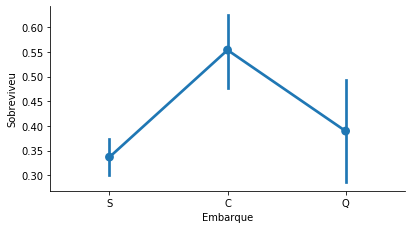

In [22]:
sns.catplot('Embarque', 'Sobreviveu', data=df, kind='point')
fig = plt.gcf()
fig.set_size_inches(6,3)
plt.show()

In [23]:
df['Embarque'].value_counts()

S    644
C    168
Q     77
Name: Embarque, dtype: int64

### FacetGrid com Pointplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


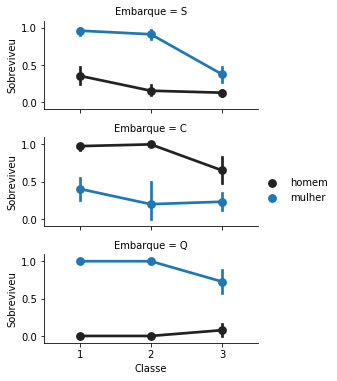

In [24]:
g = sns.FacetGrid(df, row='Embarque', height=1.8, aspect=2.2)
g.map(sns.pointplot, 'Classe', 'Sobreviveu', 'Sexo')
g.add_legend()

### Heatmap

In [25]:
df.isnull().sum()

IdPassageiro       0
Sobreviveu         0
Classe             0
Nome               0
Sexo               0
Idade            177
IrmaosConjuge      0
PaisFIlhos         0
Bilhete            0
Tarifa             0
Cabine           687
Embarque           2
dtype: int64

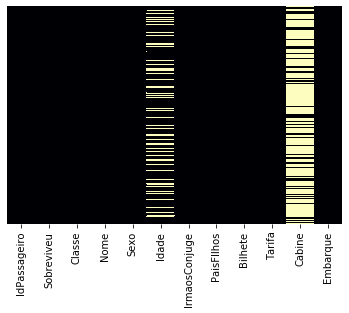

In [26]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='magma')
plt.show()

### Relplot

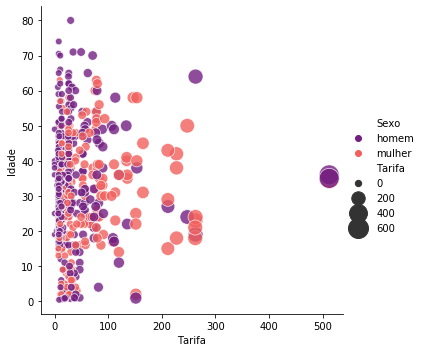

In [27]:
sns.relplot(x='Tarifa', y='Idade', data=df,
            hue='Sexo', size='Tarifa',
            sizes=(40,400), alpha=0.8, palette='magma')
plt.show()

### Scatterplot

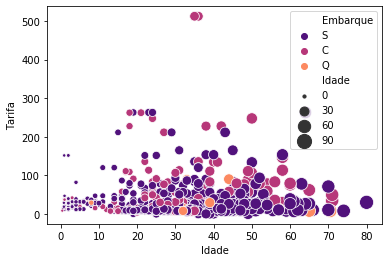

In [28]:
sns.scatterplot(x='Idade', y='Tarifa', data=df,
               hue='Embarque', size='Idade',
               palette='magma', sizes=(10,200))
plt.show()

### Pairplot

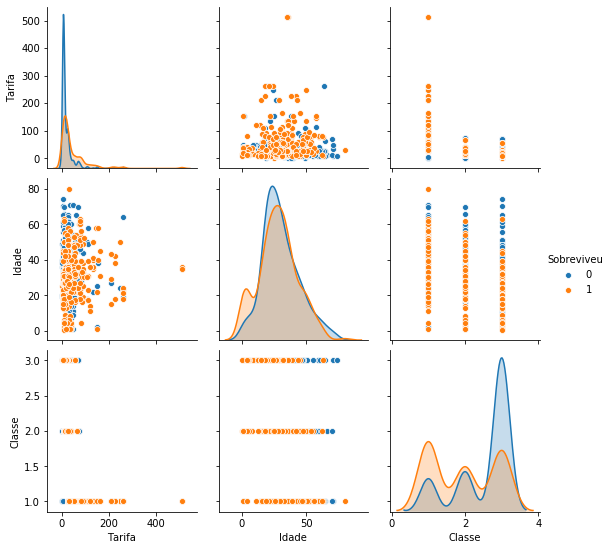

In [29]:
sns.pairplot(df[['Tarifa','Idade','Classe','Sexo','Sobreviveu']], hue='Sobreviveu')

### Jointplot tipo "kde"

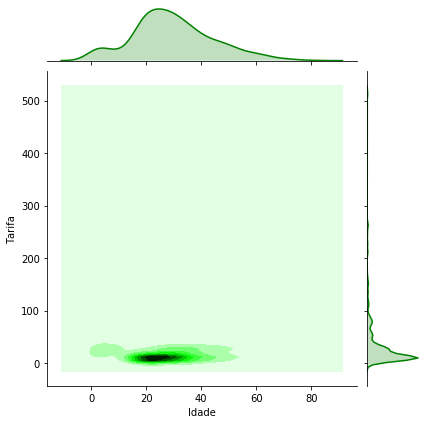

In [30]:
sns.jointplot('Idade', 'Tarifa', data=df, kind='kde', color='g')
plt.show()

### Jointplot tipo "reg"

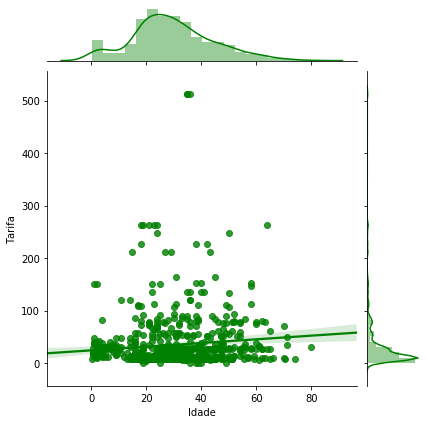

In [31]:
sns.jointplot('Idade', 'Tarifa', data=df, kind='reg', color='g', truncate=False)
plt.show()

### kdeplot

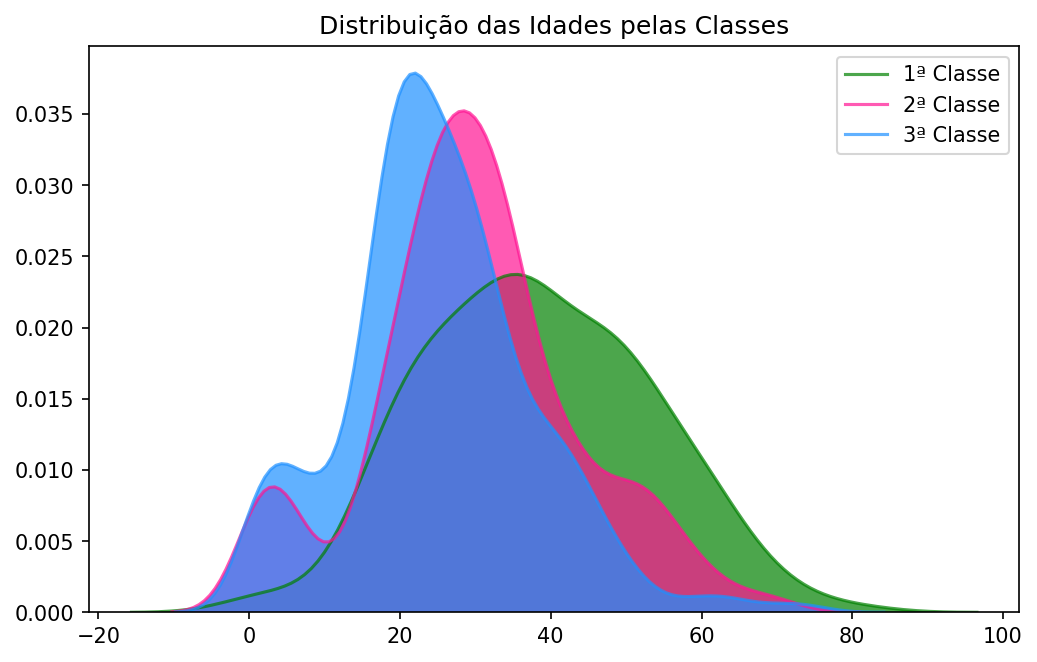

In [32]:
plt.figure(figsize=(8,5), dpi=150)

sns.kdeplot(df['Idade'].loc[df['Classe']==1],
            shade=True, color='g', label='1ª Classe', alpha=0.7)

sns.kdeplot(df['Idade'].loc[df['Classe']==2],
            shade=True, color='deeppink', label='2ª Classe', alpha=0.7)

sns.kdeplot(df['Idade'].loc[df['Classe']==3],
            shade=True, color='dodgerblue', label='3ª Classe', alpha=0.7)

plt.title('Distribuição das Idades pelas Classes')
plt.show()

### Catplot do tipo "count"

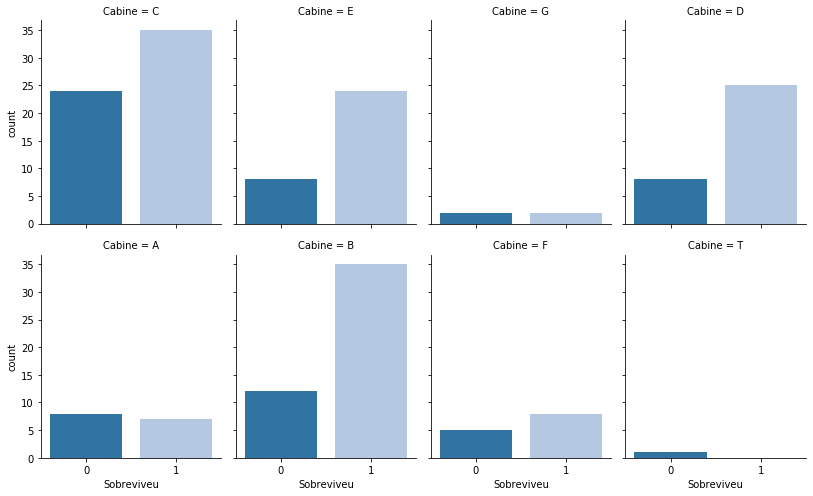

In [33]:
sns.catplot('Sobreviveu', col='Cabine',data=df[['Sobreviveu','Cabine']].dropna(),
            kind='count', height=3.5, aspect=0.8, col_wrap=4, palette='tab20')

plt.show()

### Heatmap "corr()"

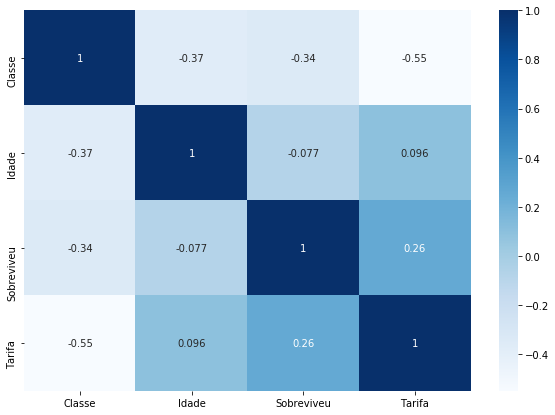

In [34]:
plt.figure(figsize=(10,7))
sns.heatmap(df[['Classe','Idade','Sobreviveu','Tarifa','Embarque']].corr(),
            cmap='Blues', annot=True)

plt.show()

In [35]:
df[['Classe','Idade','Sobreviveu','Tarifa','Embarque']].corr()

,Classe,Idade,Sobreviveu,Tarifa
Classe,1.000000,-0.369226,-0.338481,-0.549500
Idade,-0.369226,1.000000,-0.077221,0.096067
Sobreviveu,-0.338481,-0.077221,1.000000,0.257307
Tarifa,-0.549500,0.096067,0.257307,1.000000


In [36]:
df = pd.get_dummies(data=df, columns=['Embarque'], drop_first=True)

In [37]:
df[['Classe','Idade','Sobreviveu','Tarifa','Embarque_Q', 'Embarque_S']].corr()

,Classe,Idade,Sobreviveu,Tarifa,Embarque_Q,Embarque_S
Classe,1.000000,-0.369226,-0.338481,-0.549500,0.221009,0.081720
Idade,-0.369226,1.000000,-0.077221,0.096067,-0.022405,-0.032523
Sobreviveu,-0.338481,-0.077221,1.000000,0.257307,0.003650,-0.155660
Tarifa,-0.549500,0.096067,0.257307,1.000000,-0.117216,-0.166603
Embarque_Q,0.221009,-0.022405,0.003650,-0.117216,1.000000,-0.496624
Embarque_S,0.081720,-0.032523,-0.155660,-0.166603,-0.496624,1.000000


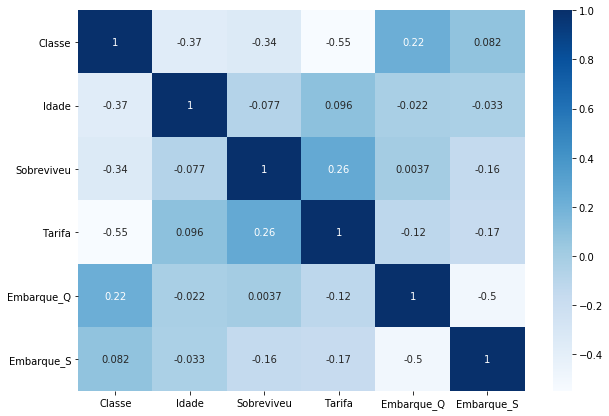

In [38]:
plt.figure(figsize=(10,7))
sns.heatmap(df[['Classe','Idade','Sobreviveu','Tarifa','Embarque_Q', 'Embarque_S']].corr(),
            cmap='Blues', annot=True)

plt.show()